In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('raw_data.csv', delimiter=';')
data = data.drop(columns=['Unnamed: 12'])
data.head(100)

,study_hrs,study_hrs_group,study_stress,study_workload,study_eff_lect,study_eff_self,study_satis,leisure_hrs,leisure_sleep_hrs,leisure_sport_hrs,leisure_social_hrs,leisure_satis
0,10.0,10.0,2,10,2,7,9,20.0,9,14.0,20.0,10
1,12.0,4.0,7,2,5,9,6,6.0,5,7.0,8.0,7
2,56.0,8.0,1,4,5,8,7,21.0,7,4.0,7.0,8
3,9.0,1.0,6,3,7,9,8,2.0,7,3.0,0.0,6
4,49.0,21.0,3,6,6,7,7,7.0,7,3.0,6.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,7.0,3,3,8,10,8,7.0,7,1.0,2.0,6
96,14.0,2.0,9,2,3,3,4,20.0,6,2.0,7.0,3
97,44.0,3.0,3,7,8,10,10,1.0,8,7.0,12.0,8
98,16.0,0.0,5,8,6,6,7,35.0,56,0.0,35.0,10


In [3]:
mask = (data['study_hrs'] > 0) & (data['study_hrs'] <= 6)
data.loc[mask, 'study_hrs'] *= 5.5

In [4]:
lower_bound = data.quantile(0.03)
upper_bound = data.quantile(0.97)
data = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [5]:
data = data.fillna(data.mean())
data.shape

(171, 12)

In [6]:
data.to_csv('data_with_clipping.csv', index=False)

#### Descriptive Statistics for the Datasets

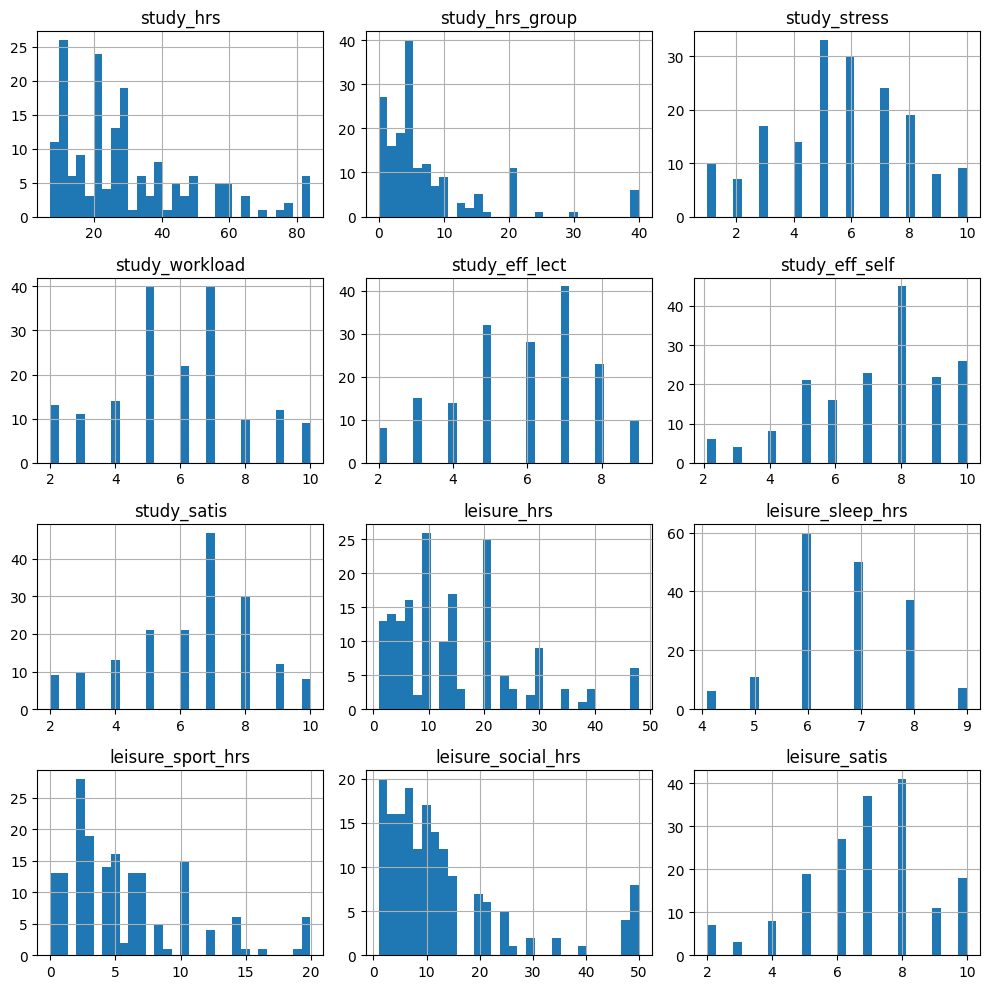

In [7]:
data.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()

In [12]:
study_features = data[['study_hrs', 'study_hrs_group', 'study_stress', 'study_workload', 'study_eff_lect','study_eff_self','study_satis']]
study_features.describe().to_latex('study_features.tex')

<Axes: >

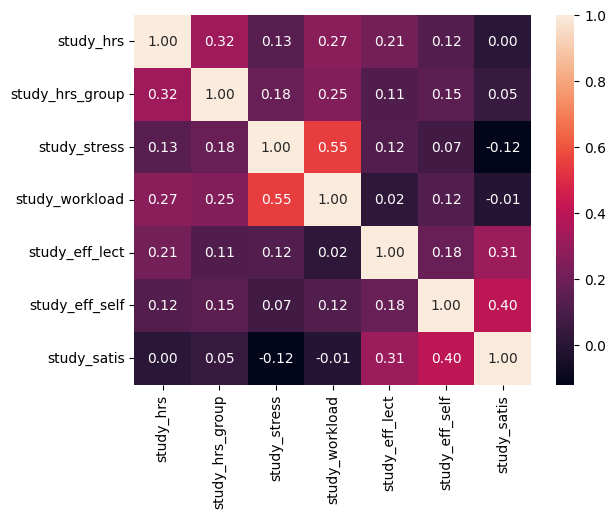

In [20]:
sns.heatmap(study_features.corr(), annot=True, fmt=".2f")

In [22]:
leisure_stats = data[['leisure_hrs', 'leisure_sleep_hrs', 'leisure_sport_hrs', 'leisure_social_hrs', 'leisure_satis']]
leisure_stats.describe().to_latex('leisure_stats.tex')

<Axes: >

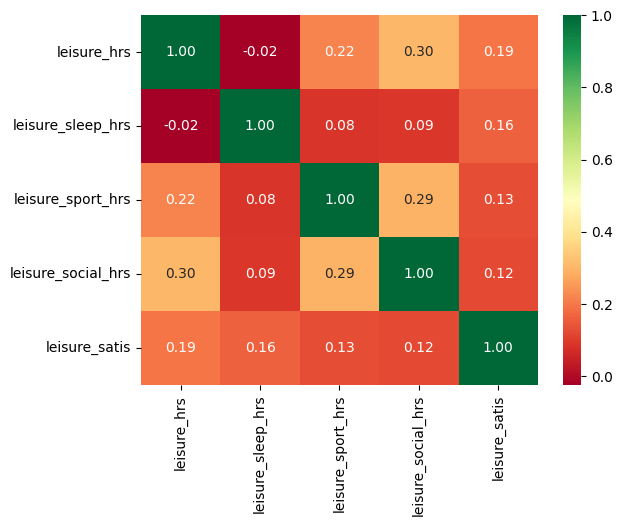

In [26]:
sns.heatmap(leisure_stats.corr(), annot=True, fmt=".2f", cmap='RdYlGn')